##### Confusion matrix of transfer learning result

In [1]:
#######################################################
model_type = 'lstm' ## fcn / lstm 
data_name = 'Heartbeat'
########################################################

37/37 [==============================] - 3s 12ms/step
Accuracy:0.937231298366294
Precision:0.8044318063121425
Recall:0.6932614508123669
F1 score:0.7346276025951322
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       956
           1       0.67      0.33      0.44         6
           2       0.86      0.86      0.86       124
           3       0.78      0.74      0.76        39
           4       0.75      0.55      0.64        38

    accuracy                           0.94      1163
   macro avg       0.80      0.69      0.73      1163
weighted avg       0.93      0.94      0.93      1163



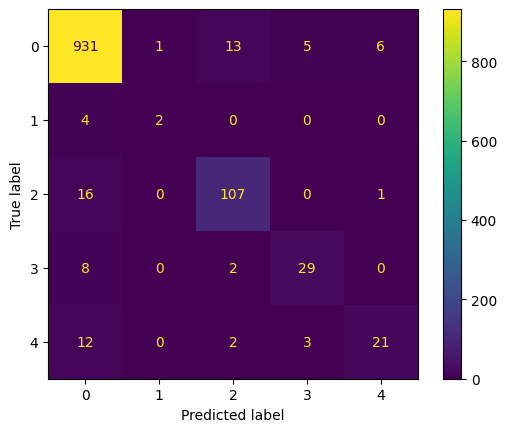

In [3]:
import keras
import pickle
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

if model_type == 'fcn':
    model_dir = 'results/transfer/{}/best_model.hdf5'.format(data_name)
elif model_type == 'lstm':
    model_dir = 'results_LSTM/transfer/{}/best_model.hdf5'.format(data_name)

with open('../Data/data_no_std.pkl', 'rb') as f:
     dataset = pickle.load(f)

test_X = dataset[1]
test_y = dataset[3]

model = keras.models.load_model(model_dir)
y_pred = model.predict(test_X)
# convert the predicted from binary to integer 
y_pred = np.argmax(y_pred , axis=1)

score = accuracy_score(test_y, y_pred)
print("Accuracy:{}".format(score))
precision = precision_score(test_y, y_pred , average = 'macro')
print("Precision:{}".format(precision))
recall = recall_score(test_y, y_pred, average = 'macro')
print("Recall:{}".format(recall))
f1 = f1_score(test_y, y_pred, average = 'macro')
print('F1 score:{}'.format(f1))

cm = confusion_matrix(test_y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

print(classification_report(test_y, y_pred))